In [92]:
import os
import pandas as pd
from docx import Document
import PyPDF2
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
file_path = f"C:/Users/data_architect/Resume Classification !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!/original_files"

In [7]:
def read_docx(file_path):
    doc = Document(file_path)
    text = ' '.join([para.text for para in doc.paragraphs])
    return text

In [9]:
def read_pdf(file_path):
    text = ''
    with open(file_path, 'rb') as file:
        reader = PyPDF2.PdfFileReader(file)
        for page_num in range(reader.numPages):
            page = reader.getPage(page_num)
            text += page.extract_text()
    return text

In [11]:
def process_files(directory, category):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.docx'):
                file_path = os.path.join(root, file)
                try:
                    text = read_docx(file_path)
                    data.append({'File Name': file, 'Text': text, 'Category': category})
                except Exception as e:
                    print(f"Error reading {file}: {e}")
            elif file.endswith('.pdf'):
                file_path = os.path.join(root, file)
                try:
                    text = read_pdf(file_path)
                    data.append({'File Name': file, 'Text': text, 'Category': category})
                except Exception as e:
                    print(f"Error reading {file}: {e}")
    return data

In [19]:
# Directories for each category
directories = {
    'sql developer': r'C:\Users\data_architect\Resume Classification !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\original_files\sql_devep-chandana',
    'peoplesoft': r'C:\Users\data_architect\Resume Classification !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\original_files\people soft-krishan',
    'workday': r'C:\Users\data_architect\Resume Classification !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\original_files\workdays-sanket'
}

all_data = []

In [21]:
for category, directory in directories.items():
    all_data.extend(process_files(directory, category))

# Create DataFrame
df = pd.DataFrame(all_data)

# Display the DataFrame
print(df.head())

Error reading Anil kumar.pdf: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.
Error reading AradhanaTripathi[4_0].pdf: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.
Error reading Buddha Vamsi.pdf: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.
Error reading kamballapradeep.pdf: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.
Error reading Nazeer Basha.pdf: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.
Error reading Neeraj Mishra.pdf: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.
Error reading premsai.pdf: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.
Error reading Priyanka L.pdf: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.
Error reading PSyamKumar[2_3].pdf: PdfFileReader is deprecated and w

In [33]:
df.head(5)

,File Name,Text,Category
0,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t SQL & MSBI Develope...,sql developer
1,AradhanaTripathi[4_0].docx,Aradhana Tripathi Current Location: Gachibow...,sql developer
2,Buddha Vamsi.docx,BUDDHA VAMSI ...,sql developer
3,kamballapradeep.docx,KAMBALLA PRADEEP ...,sql developer
4,Neeraj Mishra.docx,Resu...,sql developer


In [25]:
df.count()

File Name    32
Text         32
Category     32
dtype: int64

In [37]:
uniq = df['Category'].unique()
print( f"number of unique values: {uniq}")

number of unique values: ['sql developer' 'peoplesoft' 'workday']


## Text Mining 

In [40]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\data_architect\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\data_architect\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\data_architect\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* Text Preprocessing 

In [43]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
# calling the functions 

In [45]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and non-alphabetic tokens
    words = [word for word in words if word.isalpha() and word not in stop_words]
    # Stemming and Lemmatization
    words = [ps.stem(word) for word in words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['Processed Text'] = df['Text'].apply(preprocess_text)

In [47]:
df.head(4)

,File Name,Text,Category,Processed Text
0,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t SQL & MSBI Develope...,sql developer,anil kumar maddukuri sql msbi develop summari ...
1,AradhanaTripathi[4_0].docx,Aradhana Tripathi Current Location: Gachibow...,sql developer,aradhana tripathi current locat gachibowli hyd...
2,Buddha Vamsi.docx,BUDDHA VAMSI ...,sql developer,buddha vamsi career object year experi databas...
3,kamballapradeep.docx,KAMBALLA PRADEEP ...,sql developer,kamballa pradeep synopsi look forward aspir ch...


* Feature Extraction

In [50]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Processed Text'])

In [52]:
# Convert the matrix to a DataFrame
features_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

* EDA

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [97]:
# Display basic information about the DataFrame
print("Shape of features_df:", features_df.shape)
print("Basic statistics:\n", features_df.describe())

Shape of features_df: (32, 1658)
Basic statistics:
             abil        abl     absenc   abstract         ac     academ  \
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean    0.406250   0.031250   0.562500   0.062500   0.031250   0.218750   
std     0.559918   0.176777   1.543718   0.353553   0.176777   0.659148   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     2.000000   1.000000   7.000000   2.000000   1.000000   3.000000   

          accept     access   acclimat   accommod  ...        xml       xmlp  \
count  32.000000  32.000000  32.000000  32.000000  ...  32.000000  32.000000   
mean    0.218750   0.312500   0.031250   0.062500  ...   0.875000   0.031250   
std     0.608243   0.859013   0.

In [99]:
# Display the first few rows of the DataFrame
print("First few rows of features_df:\n", features_df.head())

First few rows of features_df:
    abil  abl  absenc  abstract  ac  academ  accept  access  acclimat  \
0     0    0       0         0   0       0       0       0         0   
1     0    0       0         0   0       2       0       0         0   
2     0    0       0         0   0       1       0       0         0   
3     1    0       0         0   0       0       0       0         0   
4     1    1       0         0   0       0       0       0         1   

   accommod  ...  xml  xmlp  xpath  xslt  xtt  year  yield  yogi  zero  zp  
0         0  ...    0     0      0     0    0     1      0     0     0   0  
1         0  ...    0     0      0     0    0     2      0     0     0   0  
2         0  ...    0     0      0     0    0     1      0     0     0   0  
3         0  ...    0     0      0     0    0     1      0     0     0   0  
4         0  ...    0     0      0     0    0     1      0     0     0   0  

[5 rows x 1658 columns]


In [103]:
# Identify the top N words with the highest TF-IDF scores
top_n = 20
tfidf_means = features_df.mean(axis=0)
top_features = tfidf_means.nlargest(top_n)

C:\Users\data_architect\AppData\Local\Temp\ipykernel_18992\1943120403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


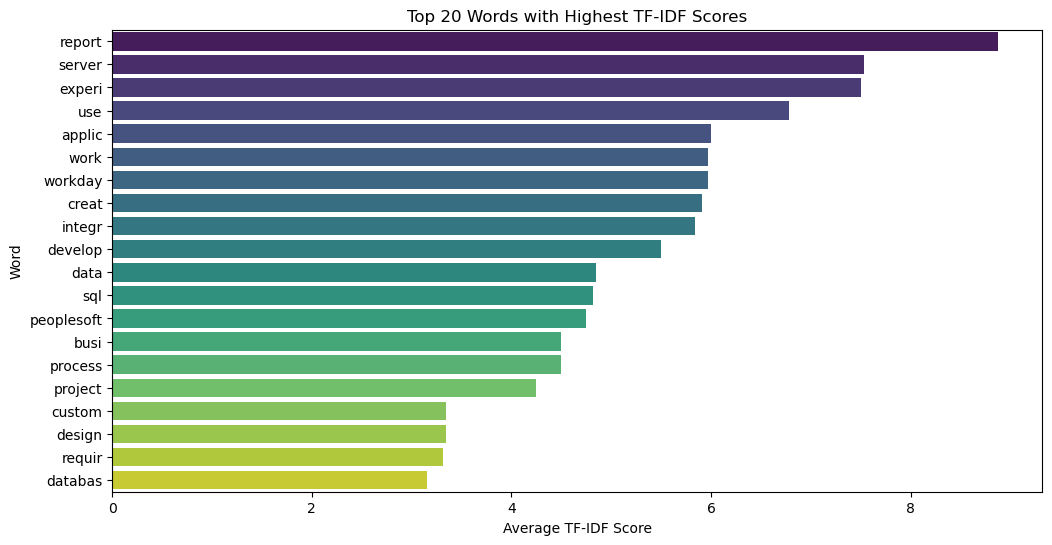

In [105]:
# Visualize the frequency of the top N words
plt.figure(figsize=(12, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title(f'Top {top_n} Words with Highest TF-IDF Scores')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Word')
plt.show()

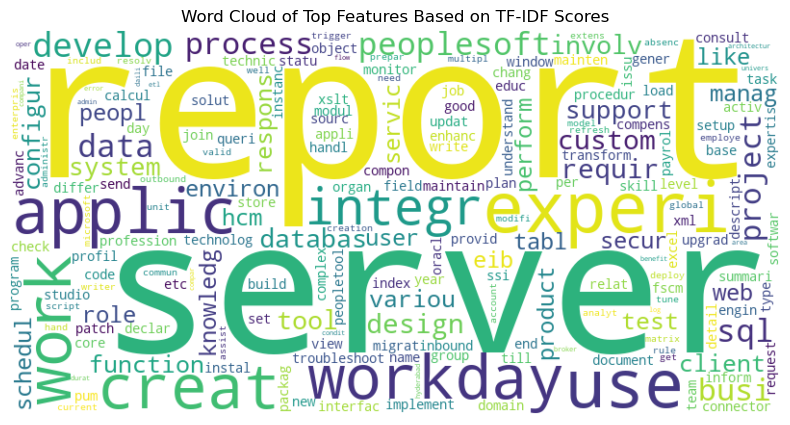

In [107]:
# Create a word cloud based on the TF-IDF scores
tfidf_means = features_df.mean(axis=0)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tfidf_means)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Top Features Based on TF-IDF Scores')
plt.axis('off')
plt.show()

In [58]:
features_df.head(3) # its process to find out the frequecy of every word in documents 

,abil,abl,absenc,abstract,ac,academ,accept,access,acclimat,accommod,...,xml,xmlp,xpath,xslt,xtt,year,yield,yogi,zero,zp
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
# Combine with the original DataFrame
df = pd.concat([df, features_df], axis=1)

In [60]:
df.head(3)

,File Name,Text,Category,Processed Text,abil,abl,absenc,abstract,ac,academ,...,xml,xmlp,xpath,xslt,xtt,year,yield,yogi,zero,zp
0,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t SQL & MSBI Develope...,sql developer,anil kumar maddukuri sql msbi develop summari ...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,AradhanaTripathi[4_0].docx,Aradhana Tripathi Current Location: Gachibow...,sql developer,aradhana tripathi current locat gachibowli hyd...,0,0,0,0,0,2,...,0,0,0,0,0,2,0,0,0,0
2,Buddha Vamsi.docx,BUDDHA VAMSI ...,sql developer,buddha vamsi career object year experi databas...,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


* Encoding the Target Variable

In [63]:
from sklearn.preprocessing import LabelEncoder
# Encode the target variable
label_encoder = LabelEncoder()

In [65]:
df['Encoded Category'] = label_encoder.fit_transform(df['Category'])
y = df['Encoded Category']

In [67]:
df.head(2)

,File Name,Text,Category,Processed Text,abil,abl,absenc,abstract,ac,academ,...,xmlp,xpath,xslt,xtt,year,yield,yogi,zero,zp,Encoded Category
0,Anil kumar.docx,ANIL KUMAR MADDUKURI \t\t SQL & MSBI Develope...,sql developer,anil kumar maddukuri sql msbi develop summari ...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,AradhanaTripathi[4_0].docx,Aradhana Tripathi Current Location: Gachibow...,sql developer,aradhana tripathi current locat gachibowli hyd...,0,0,0,0,0,2,...,0,0,0,0,2,0,0,0,0,1


* Model Selection and Training

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.2, random_state=42)

In [74]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [76]:
# Make predictions
y_pred = model.predict(X_test)

* model evaluation

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [84]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



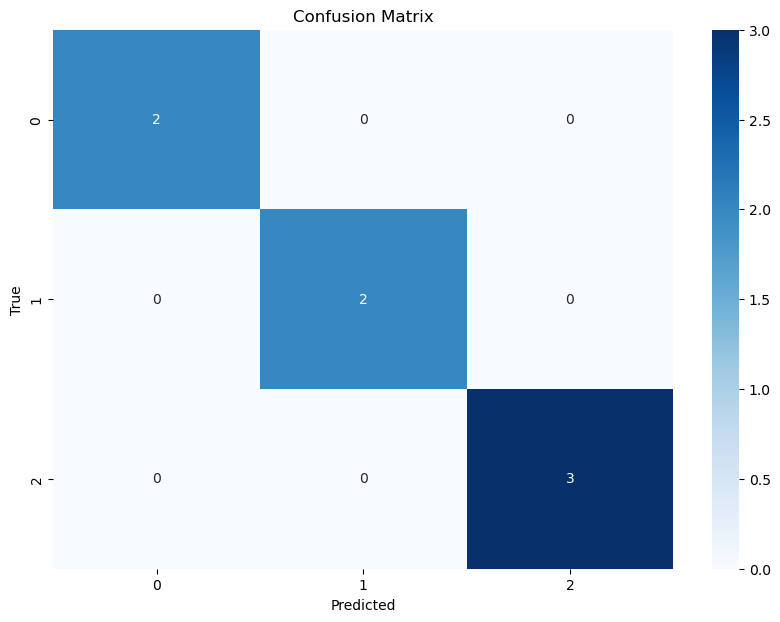

In [86]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The Logistic Regression model achieved perfect classification on the provided dataset, with an accuracy of 1.00 on both the training and testing sets. This indicates that the model was able to correctly classify all instances in the dataset. However, it is important to validate these results with a larger and more diverse dataset to ensure the model's generalizability to unseen data.

* Mahesh Rathod